## Create a new surface dataset 
<br>
<u>Motivation</u>: <br>For the CLASP CPT, we would like to have a few experiments where only a single patch type is used at the ARM site. This function will use a default surfdata file (whatever gets used by default in a single column run - determined by looking at lnd_in file), and then pick out the gridcell that contains the ARM site and modify the PFTs/CFTs in <i>just that one grid cell</i>. <br>
<br>
Indices in CLM can be found here: https://www.cesm.ucar.edu/models/clm/surface.heterogeneity.html <br><br>

In [1]:
import xarray as xr 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import matplotlib.patches as mpatches


## Read in original surfdata 

In [2]:
# Read in original surfdata file that's used in SCAM run
surfFile = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824.nc'
surfdata = xr.open_dataset(surfFile, engine='netcdf4')

# Pick out a few values - lat, lon, and 
lsmlat = surfdata.LATIXY.values
lsmlon = surfdata.LONGXY.values

# Indices of natural PFTs and crop PFTs (CFTs)
natpft = surfdata.natpft.values
cft    = surfdata.cft.values


In [3]:
# ARM site location
armLon = 262.5
armLat = 36.6


### Map out pcts of PFTs and CFTs in original files

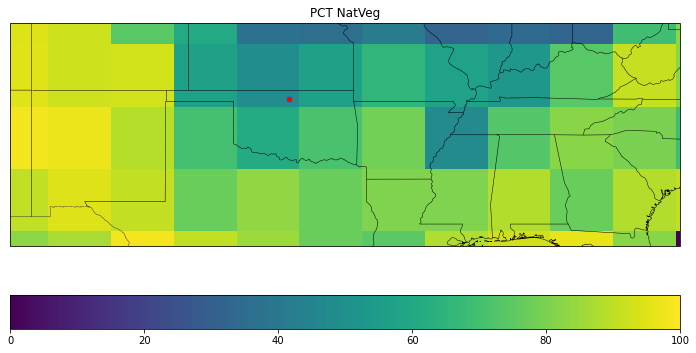

In [32]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot of PCT_NATVEG (percentage of each gridcell that's naturally vegetated)
cplot = ax1.pcolormesh(lsmlon,lsmlat,surfdata.PCT_NATVEG.values)
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT NatVeg')

# Add point for ARM site 
ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



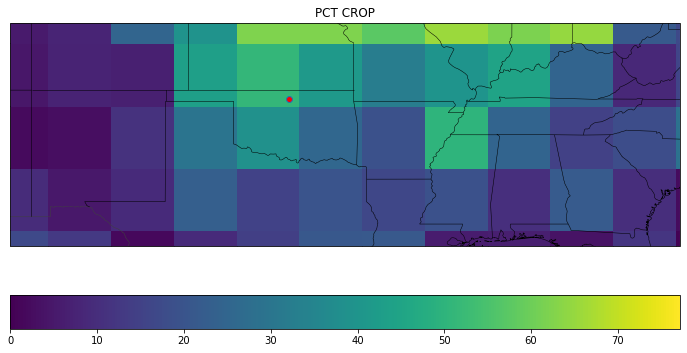

In [33]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for pct of each gridcell covered by crop types
cplot = ax1.pcolormesh(lsmlon,lsmlat,surfdata.PCT_CROP.values)
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT CROP')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



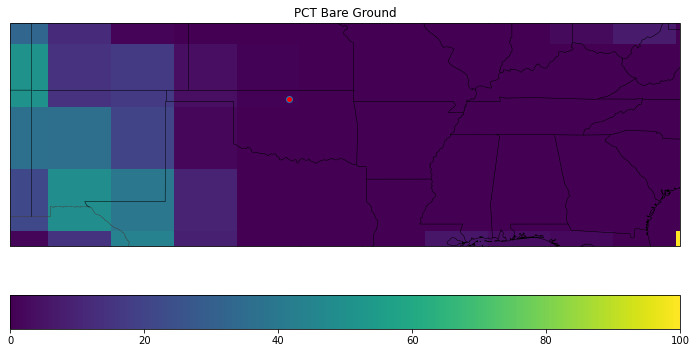

In [34]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for a single type of PFT: bare ground (index=0)
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[0,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')
ax1.set_title('PCT Bare Ground')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



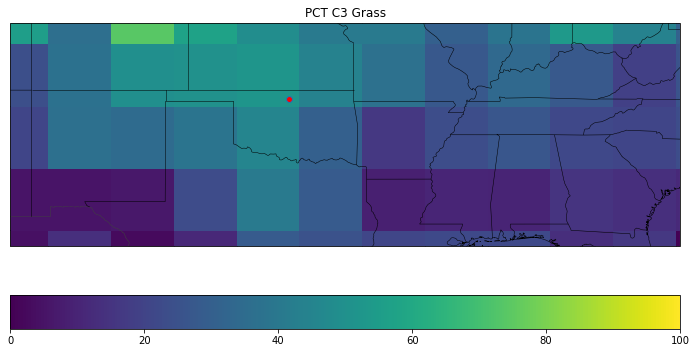

In [35]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot for fraction of gridcell covered with C3 grass 
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 Grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



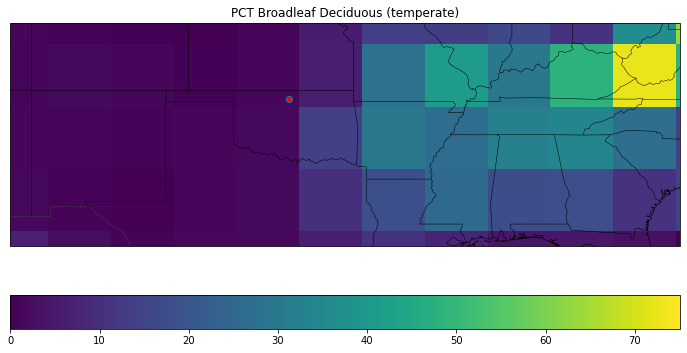

In [36]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot with fraction of broadleaf deciduous temperatre trees 
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(surfdata.PCT_NAT_PFT.values[7,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT Broadleaf Deciduous (temperate)')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



## Focus in on ARM site

In [4]:
# Get lat/lons around Oklahoma: 

ilat = np.where((lsmlat[:,0]>=armLat-1.2) & (lsmlat[:,0]<=armLat+1.2))[0]
ilon = np.where((lsmlon[0,:]>=armLon-1.2) & (lsmlon[0,:]<=armLon+1.2))[0]


### What are patch types present by default? 
Written out to log file: col type, patch type, land unit type, and weight. 

In [14]:
lndFile = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/lnd.log.210315-162244'

with open(lndFile) as f:
    lines = f.readlines()


In [15]:
# Find place to end search (use only one timestep): 
for iLines in range(len(lines)):
    if lines[iLines].startswith(' clm: completed timestep            0')==True:
        endLines = iLines
        
# Now loop through that first time step, get necessary variables 
selLines = lines[0:endLines]

patchWeights = []
patchTypes   = []
colTypes     = []
luTypes      = []

for iLines in range(len(selLines)):
    if selLines[iLines].startswith(' MDF: patch weight: ')==True:
        strArr = selLines[iLines].split(':')
        pWeight      = strArr[2].split('\n')
        patchWeights = np.append(patchWeights, float(pWeight[0]))
    
    if selLines[iLines].startswith(' MDF: patch type...')==True:
        strArr     = selLines[iLines].split('...')
        pType      = strArr[1].split('\n')
        patchTypes = np.append(patchTypes, int(pType[0]))
        
    if selLines[iLines].startswith(' MDF: col type...')==True:
        strArr     = selLines[iLines].split('...')
        cType      = strArr[1].split('\n')
        colTypes   = np.append(colTypes, int(cType[0]))
        
    if selLines[iLines].startswith(' MDF: landunit type...')==True:
        strArr     = selLines[iLines].split('...')
        lType      = strArr[1].split('\n')
        luTypes    = np.append(luTypes, int(lType[0]))


In [38]:
print('LU type    col type    patch type    patch weight')
print('-------    --------    ----------    ------------')
for iPatch in range(len(patchTypes)):
    print('%4i %11i %12i %19e' % (luTypes[iPatch], colTypes[iPatch], patchTypes[iPatch], patchWeights[iPatch]))
    

LU type    col type    patch type    patch weight
-------    --------    ----------    ------------
   1           1            0        3.237421e-03
   1           1            1        1.463821e-03
   1           1            7        6.571512e-03
   1           1           13        2.555583e-01
   1           1           14        2.216714e-01
   2         215           15        4.874110e-01
   2         216           16        2.255482e-02
   8          71            0        8.849021e-06
   8          72            0        2.949674e-06
   8          73            0        2.949674e-06
   8          74            0        2.064772e-06
   8          75            0        8.849022e-07
   9          71            0        7.570315e-04
   9          72            0        2.523438e-04
   9          73            0        2.523438e-04
   9          74            0        1.261719e-04
   9          75            0        1.261719e-04


In [40]:
iHD = np.where(luTypes==8)[0]
print(np.sum(patchWeights[iHD]))

iMD = np.where(luTypes==9)[0]
np.sum(patchWeights[iMD])


1.769804258179516e-05


0.0015140630558944314

In [46]:
(np.sum(patchWeights[0:7])+np.sum(patchWeights[iMD])+np.sum(patchWeights[iHD]))

0.9999999999999999

### Case 1: All (and only) bare ground

In [15]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_100 = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_100[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_0 = np.copy(surfdata.PCT_CROP.values)
pct_crop_0[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_0 = np.copy(surfdata.PCT_CFT.values)
pct_cft_0[0, ilat,ilon] = 100.0
pct_cft_0[1, ilat,ilon] = 0.0

pct_wetland_0 = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_0[ilat,ilon] = 0.0

pct_lake_0 = np.copy(surfdata.PCT_LAKE.values)
pct_lake_0[ilat,ilon] = 0.0

pct_glacier_0 = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_0[ilat,ilon] = 0.0

pct_urban_0 = np.copy(surfdata.PCT_URBAN.values)
pct_urban_0[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_bareGround = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_bareGround[0, ilat,ilon]   = 100.0
pct_nat_pft_bareGround[1::, ilat,ilon] = 0.0

In [16]:
# Santy check: 
#   When pct_crop is zero, what do you do with pct_cft?? 
i0,j0 = np.where(surfdata.PCT_CROP.values==0.0)
len(i0)

print(surfdata.PCT_CROP.values[i0[4300],j0[4300]])
print(surfdata.PCT_CFT.values[:,i0[4300],j0[4300]])


0.0
[100.   0.]


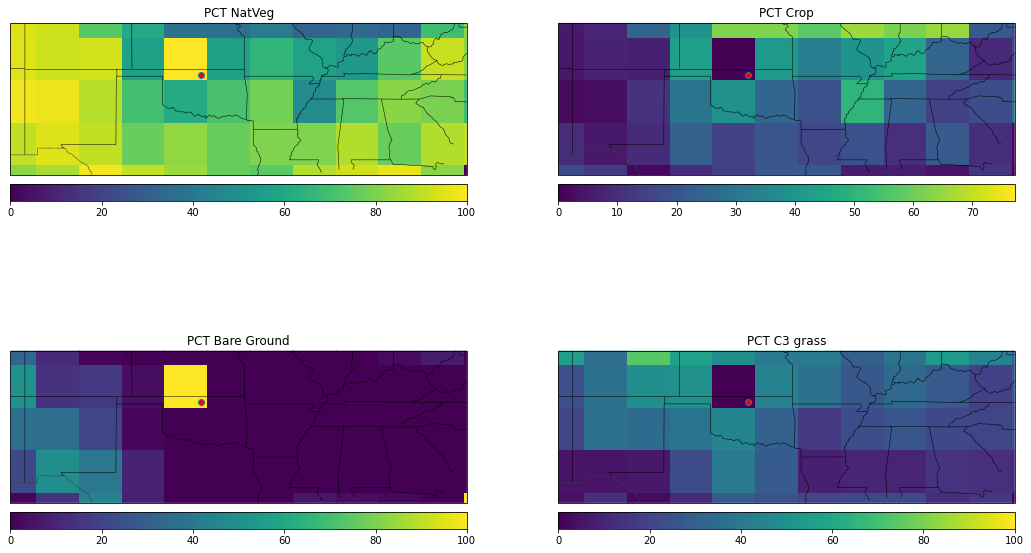

In [37]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_100)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_0)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_bareGround[0,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Bare Ground')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_bareGround[13,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT C3 grass')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



In [89]:
# Create new surfdata with *all and only* bare ground at ARM point
surfdata_allBareGround = surfdata.copy(deep=True)

surfdata_allBareGround['PCT_NATVEG'].values  = pct_natVeg_100
surfdata_allBareGround['PCT_NAT_PFT'].values = pct_nat_pft_bareGround
surfdata_allBareGround['PCT_CROP'].values    = pct_crop_0
surfdata_allBareGround['PCT_CFT'].values     = pct_cft_0
surfdata_allBareGround['PCT_WETLAND'].values = pct_wetland_0
surfdata_allBareGround['PCT_LAKE'].values    = pct_lake_0
surfdata_allBareGround['PCT_GLACIER'].values = pct_glacier_0
surfdata_allBareGround['PCT_URBAN'].values   = pct_urban_0


In [90]:
## Now convert to new netCDF file 
savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaBareGroundONLY.nc'

surfdata_allBareGround.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Case 2: One irrigated crop patch

In [5]:
# Set values to indicate just one patch: irrigated crop
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 100.0

pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 0.0      # non-irrigated
pct_cft_new[1, ilat,ilon] = 100.0    # irrigated

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon] = 0.0
pct_nat_pft_new[0, ilat,ilon] = 100.0


In [6]:
# Santy check: 
#   When pct_natveg is zero, what do you do with pct_nat_pft?? 
i0,j0 = np.where(surfdata.PCT_NATVEG.values==0.0)
len(i0)

print(surfdata.PCT_NATVEG.values[i0[430],j0[430]])
print(surfdata.PCT_NAT_PFT.values[:,i0[430],j0[430]])


0.0
[100.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.]


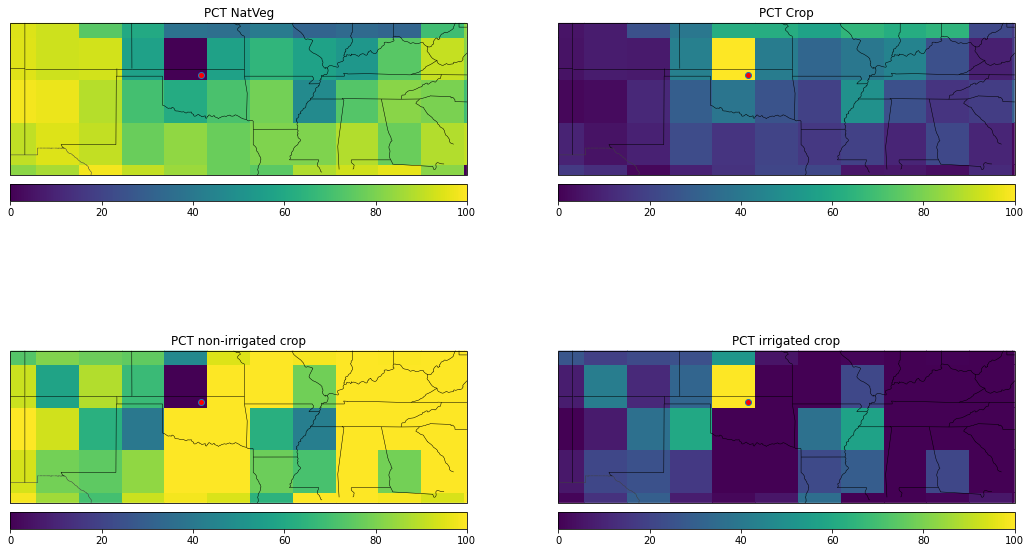

In [7]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_new)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_cft_new[0,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT non-irrigated crop')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_cft_new[1,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT irrigated crop')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



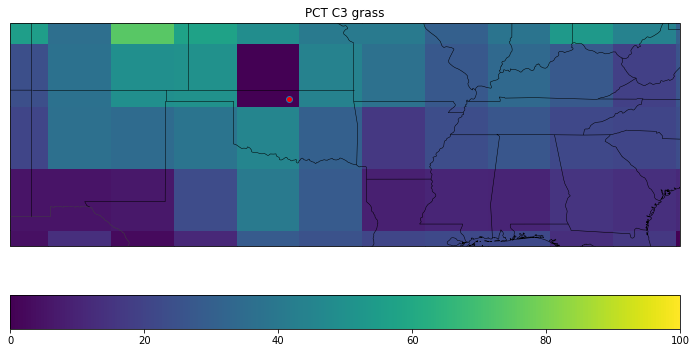

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())




In [9]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allIrrigated = surfdata.copy(deep=True)

surfdata_allIrrigated['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allIrrigated['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allIrrigated['PCT_CROP'].values    = pct_crop_new
surfdata_allIrrigated['PCT_CFT'].values     = pct_cft_new
surfdata_allIrrigated['PCT_WETLAND'].values = pct_wetland_new
surfdata_allIrrigated['PCT_LAKE'].values    = pct_lake_new
surfdata_allIrrigated['PCT_GLACIER'].values = pct_glacier_new
surfdata_allIrrigated['PCT_URBAN'].values   = pct_urban_new



In [10]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaIrrigatedCropONLY.nc'

surfdata_allIrrigated.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')



### Case 3: All C3 grass

In [5]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon]   = 0.0
pct_nat_pft_new[13, ilat,ilon] = 100.0


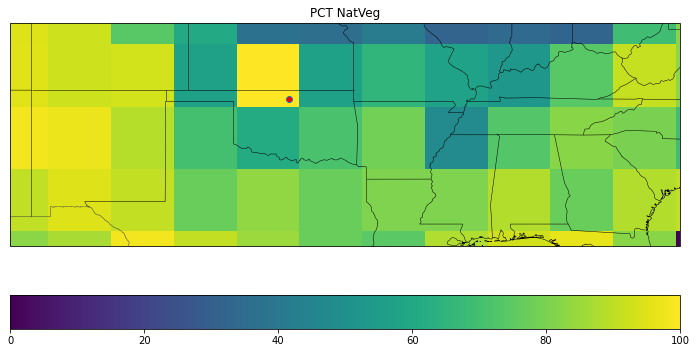

In [6]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT NatVeg')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


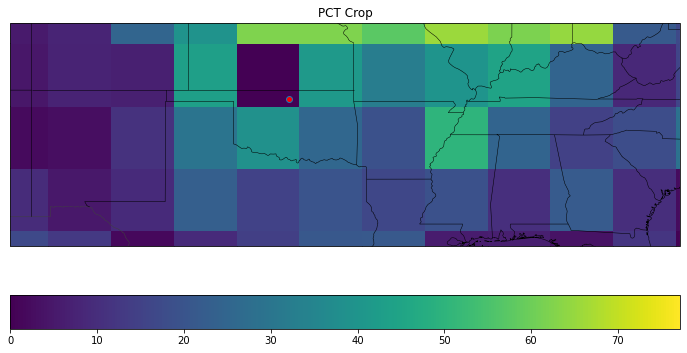

In [7]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_crop_new)
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT Crop')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


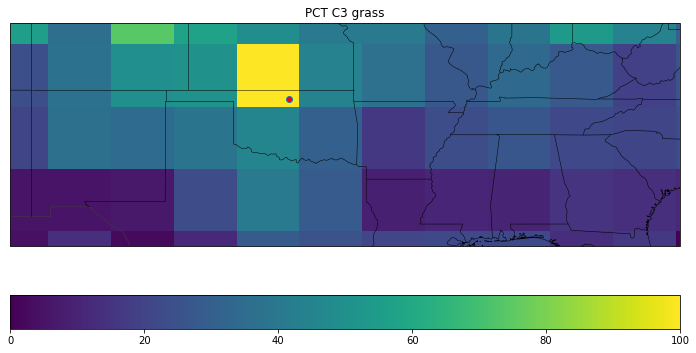

In [8]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


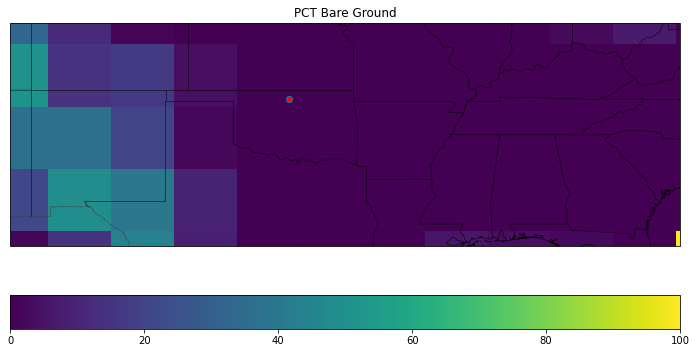

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[0,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT Bare Ground')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())





In [10]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allC3grass = surfdata.copy(deep=True)

surfdata_allC3grass['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allC3grass['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allC3grass['PCT_CROP'].values    = pct_crop_new
surfdata_allC3grass['PCT_CFT'].values     = pct_cft_new
surfdata_allC3grass['PCT_WETLAND'].values = pct_wetland_new
surfdata_allC3grass['PCT_LAKE'].values    = pct_lake_new
surfdata_allC3grass['PCT_GLACIER'].values = pct_glacier_new
surfdata_allC3grass['PCT_URBAN'].values   = pct_urban_new


In [11]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaC3grassONLY.nc'

surfdata_allC3grass.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')




### Case 4: All crop, but not irrigated

In [11]:
# Set values to indicate just one patch: irrigated crop
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 100.0

pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0    # non-irrigated
pct_cft_new[1, ilat,ilon] =   0.0    # irrigated

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon] = 0.0
pct_nat_pft_new[0, ilat,ilon] = 100.0




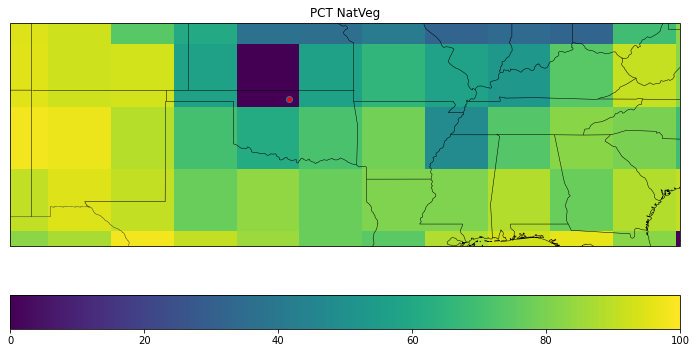

In [12]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT NatVeg')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


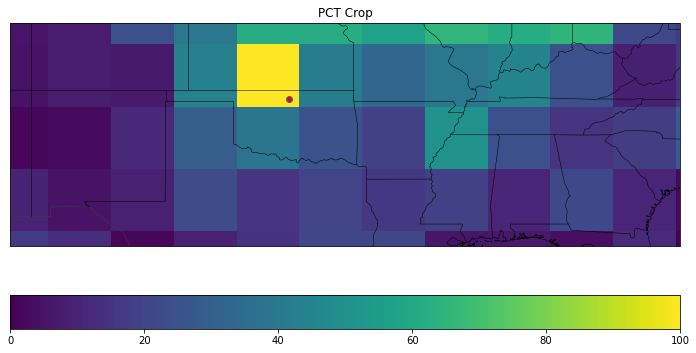

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_crop_new)
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT Crop')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())





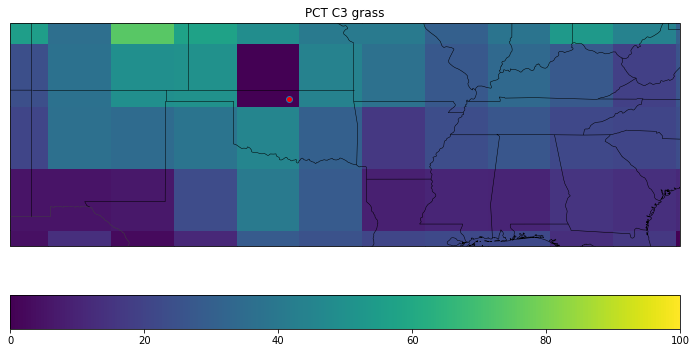

In [14]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[13,:,:]))
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT C3 grass')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



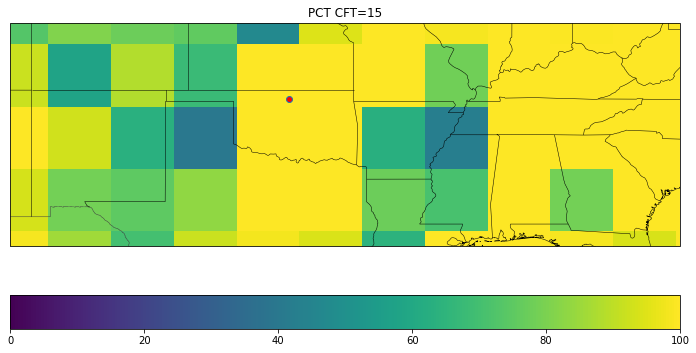

In [15]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_cft_new[0,:,:])
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT CFT=15')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


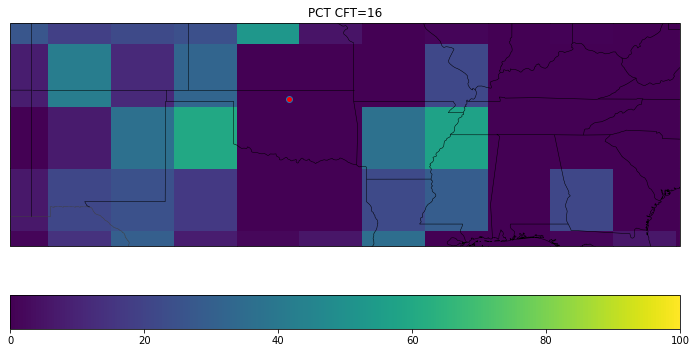

In [16]:
fig, ax1 = plt.subplots(1,1, figsize=(12, 6), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
ax1.set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())

ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#   Set up to add states to plots
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plot
cplot = ax1.pcolormesh(lsmlon,lsmlat,pct_cft_new[1,:,:])
cbar  = plt.colorbar(cplot, orientation='horizontal')

ax1.set_title('PCT CFT=16')

ax1.plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



In [17]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allRainCrop = surfdata.copy(deep=True)

surfdata_allRainCrop['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allRainCrop['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allRainCrop['PCT_CROP'].values    = pct_crop_new
surfdata_allRainCrop['PCT_CFT'].values     = pct_cft_new
surfdata_allRainCrop['PCT_WETLAND'].values = pct_wetland_new
surfdata_allRainCrop['PCT_LAKE'].values    = pct_lake_new
surfdata_allRainCrop['PCT_GLACIER'].values = pct_glacier_new
surfdata_allRainCrop['PCT_URBAN'].values   = pct_urban_new


In [18]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaRainCropONLY.nc'

surfdata_allRainCrop.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Case 5: All tree (Broadleaf Deciduous, Temperate -- PFT = 7)

In [5]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon]   = 0.0
pct_nat_pft_new[7, ilat,ilon] = 100.0



In [6]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allTree = surfdata.copy(deep=True)

surfdata_allTree['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allTree['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allTree['PCT_CROP'].values    = pct_crop_new
surfdata_allTree['PCT_CFT'].values     = pct_cft_new
surfdata_allTree['PCT_WETLAND'].values = pct_wetland_new
surfdata_allTree['PCT_LAKE'].values    = pct_lake_new
surfdata_allTree['PCT_GLACIER'].values = pct_glacier_new
surfdata_allTree['PCT_URBAN'].values   = pct_urban_new



In [7]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaTreeONLY.nc'

surfdata_allTree.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')

### Case 6: All Tree (needleleaf evergrean, PFT = 1)

In [5]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon]   = 0.0
pct_nat_pft_new[1, ilat,ilon] = 100.0


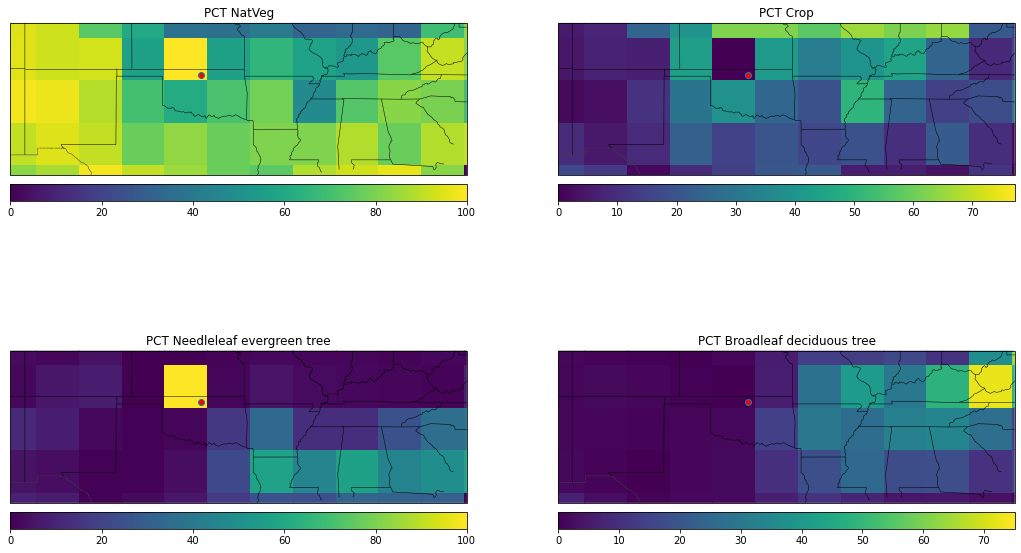

In [6]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_new)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[1,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Needleleaf evergreen tree')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[7,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT Broadleaf deciduous tree')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())




In [7]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allEvergreenTree = surfdata.copy(deep=True)

surfdata_allEvergreenTree['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allEvergreenTree['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allEvergreenTree['PCT_CROP'].values    = pct_crop_new
surfdata_allEvergreenTree['PCT_CFT'].values     = pct_cft_new
surfdata_allEvergreenTree['PCT_WETLAND'].values = pct_wetland_new
surfdata_allEvergreenTree['PCT_LAKE'].values    = pct_lake_new
surfdata_allEvergreenTree['PCT_GLACIER'].values = pct_glacier_new
surfdata_allEvergreenTree['PCT_URBAN'].values   = pct_urban_new


In [8]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaEvergreenTreeONLY.nc'

surfdata_allEvergreenTree.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Case 7: All C4 grass (PFT = 14)

In [19]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 100.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon]   = 0.0
pct_nat_pft_new[14, ilat,ilon] = 100.0

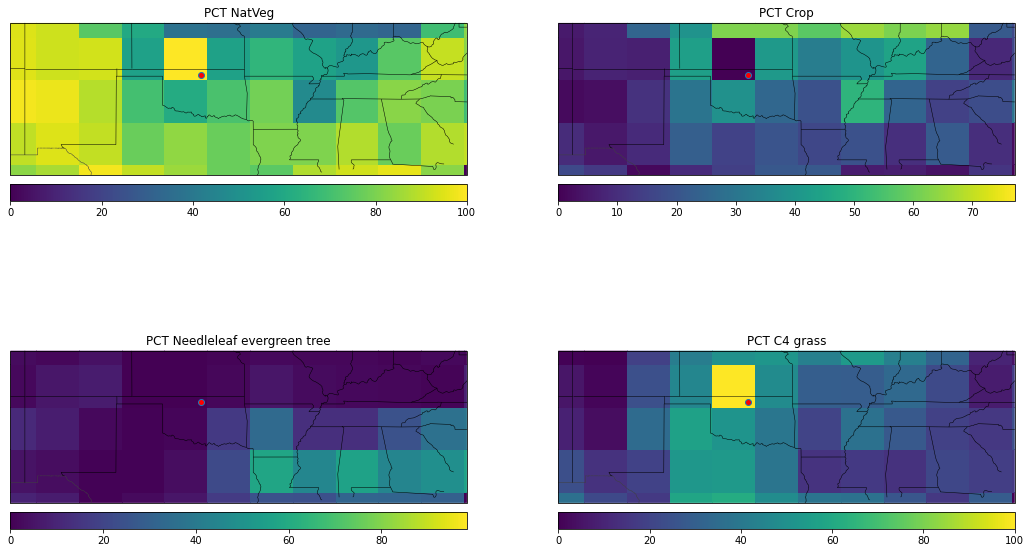

In [20]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_new)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[1,:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Needleleaf evergreen tree')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[14,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT C4 grass')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



In [21]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allC4grass = surfdata.copy(deep=True)

surfdata_allC4grass['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allC4grass['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allC4grass['PCT_CROP'].values    = pct_crop_new
surfdata_allC4grass['PCT_CFT'].values     = pct_cft_new
surfdata_allC4grass['PCT_WETLAND'].values = pct_wetland_new
surfdata_allC4grass['PCT_LAKE'].values    = pct_lake_new
surfdata_allC4grass['PCT_GLACIER'].values = pct_glacier_new
surfdata_allC4grass['PCT_URBAN'].values   = pct_urban_new


In [22]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaC4grassONLY.nc'

surfdata_allC4grass.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Case 8: All urban 

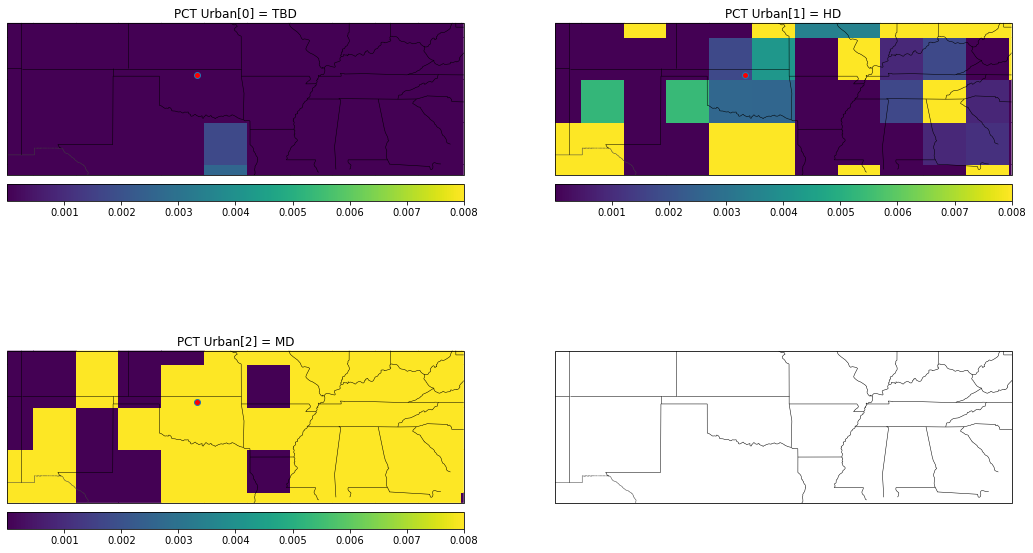

In [13]:
fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,surfdata.PCT_URBAN.values[0,:,:],
                          vmax=8e-3, vmin=8e-8)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT Urban[0] = TBD')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,surfdata.PCT_URBAN.values[1,:,:],
                          vmax=8e-3, vmin=8e-8)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Urban[1] = HD')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,surfdata.PCT_URBAN.values[2,:,:],
                          vmax=8e-3, vmin=8e-8)
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Urban[2] = MD')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())



#### All urban (medium density) 

In [47]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[0, ilat,ilon] = 0.0         # Tall building density
pct_urban_new[1, ilat,ilon] = 0.0         # High density
pct_urban_new[2, ilat,ilon] = 100.0       # Medium density 

## Choose PFT type to cover cell with:
#    Again, SCAM run can fail because sum of wt_pft not 1.0. 
#    So set the first weight of a pft to 100.0. Will still get
#    ignored (since pct_natveg = 0.0)
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon] = 0.0
pct_nat_pft_new[0, ilat,ilon] = 100.0

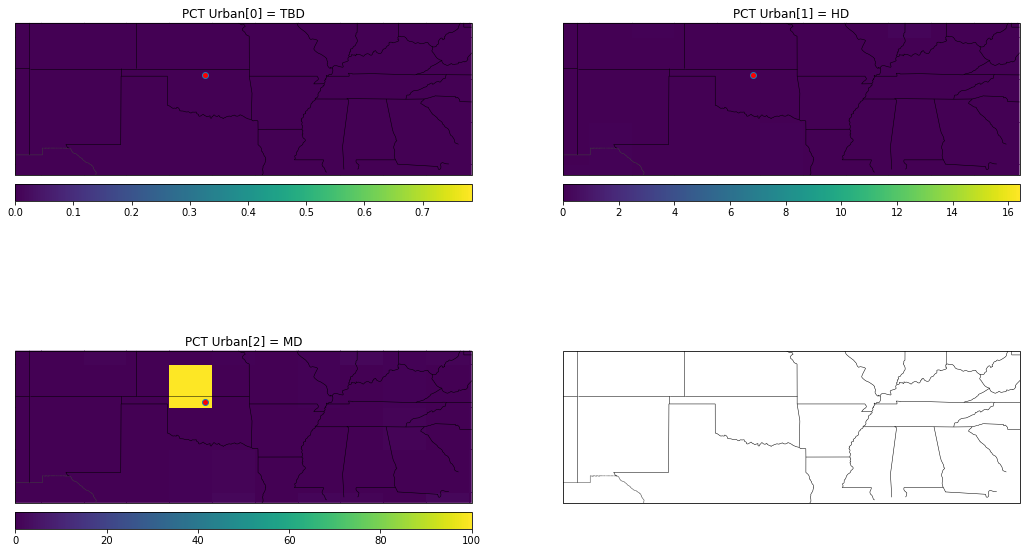

In [48]:
fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_urban_new[0,:,:],
                          )
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT Urban[0] = TBD')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_urban_new[1,:,:],
                          )
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Urban[1] = HD')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,pct_urban_new[2,:,:],
                         )
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Urban[2] = MD')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())




In [49]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allMedDensityUrban = surfdata.copy(deep=True)

surfdata_allMedDensityUrban['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allMedDensityUrban['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allMedDensityUrban['PCT_CROP'].values    = pct_crop_new
surfdata_allMedDensityUrban['PCT_CFT'].values     = pct_cft_new
surfdata_allMedDensityUrban['PCT_WETLAND'].values = pct_wetland_new
surfdata_allMedDensityUrban['PCT_LAKE'].values    = pct_lake_new
surfdata_allMedDensityUrban['PCT_GLACIER'].values = pct_glacier_new
surfdata_allMedDensityUrban['PCT_URBAN'].values   = pct_urban_new


In [50]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaMedDensityUrbanONLY.nc'

surfdata_allMedDensityUrban.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


#### All urban (high density) 

In [51]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 0.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[0, ilat,ilon] = 0.0       # Tall building density
pct_urban_new[1, ilat,ilon] = 100.0     # High density
pct_urban_new[2, ilat,ilon] = 0.0       # Medium density 

## Choose PFT type to cover cell with:
#    Again, SCAM run can fail because sum of wt_pft not 1.0. 
#    So set the first weight of a pft to 100.0. Will still get
#    ignored (since pct_natveg = 0.0)
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon] = 0.0
pct_nat_pft_new[0, ilat,ilon] = 100.0

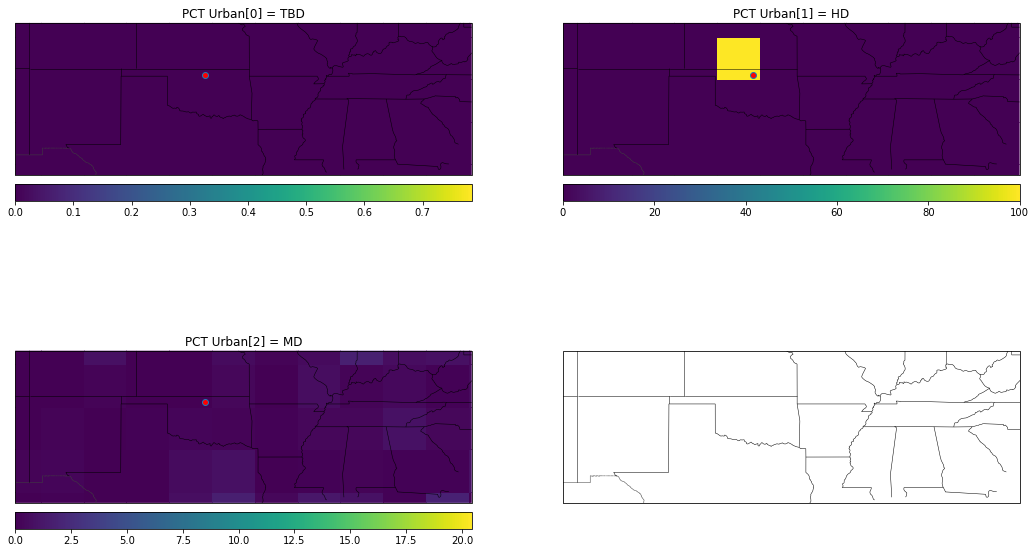

In [52]:
fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_urban_new[0,:,:],
                          )
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT Urban[0] = TBD')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_urban_new[1,:,:],
                          )
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Urban[1] = HD')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,pct_urban_new[2,:,:],
                         )
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Urban[2] = MD')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())


In [54]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allHighDensityUrban = surfdata.copy(deep=True)

surfdata_allHighDensityUrban['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allHighDensityUrban['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allHighDensityUrban['PCT_CROP'].values    = pct_crop_new
surfdata_allHighDensityUrban['PCT_CFT'].values     = pct_cft_new
surfdata_allHighDensityUrban['PCT_WETLAND'].values = pct_wetland_new
surfdata_allHighDensityUrban['PCT_LAKE'].values    = pct_lake_new
surfdata_allHighDensityUrban['PCT_GLACIER'].values = pct_glacier_new
surfdata_allHighDensityUrban['PCT_URBAN'].values   = pct_urban_new


In [55]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaHighDensityUrbanONLY.nc'

surfdata_allHighDensityUrban.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')


### Extra case: All lake??

In [15]:
# Test setting pct nat veg = 100 in this box... 
pct_natVeg_new = np.copy(surfdata.PCT_NATVEG.values)
pct_natVeg_new[ilat,ilon] = 0.0

# Means everything else (pct) has to be 0
pct_crop_new = np.copy(surfdata.PCT_CROP.values)
pct_crop_new[ilat,ilon] = 0.0

# Special treatment of pct_cft: 
#   SCAM run fails because "sum of wt_cft not    1.00000000000000"
#   When pct_crop is 0 (tested at a location below), it seems like 
#   the first index is set to 100 and the second to 0.0. 
pct_cft_new = np.copy(surfdata.PCT_CFT.values)
pct_cft_new[0, ilat,ilon] = 100.0
pct_cft_new[1, ilat,ilon] = 0.0

pct_wetland_new = np.copy(surfdata.PCT_WETLAND.values)
pct_wetland_new[ilat,ilon] = 0.0

pct_lake_new = np.copy(surfdata.PCT_LAKE.values)
pct_lake_new[ilat,ilon] = 100.0

pct_glacier_new = np.copy(surfdata.PCT_GLACIER.values)
pct_glacier_new[ilat,ilon] = 0.0

pct_urban_new = np.copy(surfdata.PCT_URBAN.values)
pct_urban_new[:, ilat,ilon] = 0.0

## Choose PFT type to cover cell with:
pct_nat_pft_new = np.copy(surfdata.PCT_NAT_PFT.values)
pct_nat_pft_new[:, ilat,ilon]   = 0.0
pct_nat_pft_new[0, ilat,ilon]   = 100.0


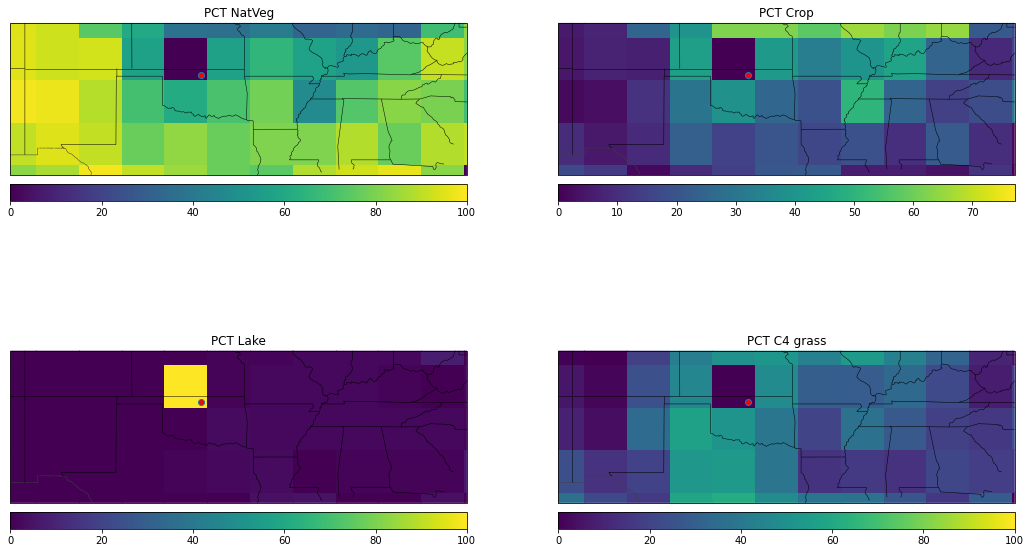

In [17]:
## A few plots to sanity check that this is working...

fig, axs = plt.subplots(2,2, figsize=(18, 12), 
                        facecolor='w', edgecolor='k',
                        subplot_kw={'projection':ccrs.PlateCarree()})
axs = axs.ravel()
fig.subplots_adjust(hspace=0.01)

# Set up maps: extent
axs[0].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[1].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[2].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
axs[3].set_extent([-110,-80,30,40], crs=ccrs.PlateCarree())
# Set up maps: borders+states
#   Only do once: create state lines
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
#   Add those state lines
axs[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[0].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[1].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[2].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[2].add_feature(states_provinces,edgecolor='k',linewidth=0.5)
axs[3].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
axs[3].add_feature(states_provinces,edgecolor='k',linewidth=0.5)

# Add plots! 
cplot0 = axs[0].pcolormesh(lsmlon,lsmlat,pct_natVeg_new)
ax_position = axs[0].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot0, orientation='horizontal',cax=cbar_ax)
axs[0].set_title('PCT NatVeg')
axs[0].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

cplot1 = axs[1].pcolormesh(lsmlon,lsmlat,pct_crop_new)
ax_position = axs[1].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot1, orientation='horizontal',cax=cbar_ax)
axs[1].set_title('PCT Crop')
axs[1].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot2 = axs[2].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_lake_new[:,:]))
ax_position = axs[2].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot2, orientation='horizontal',cax=cbar_ax)
axs[2].set_title('PCT Lake')
axs[2].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())

# Add plot
cplot3 = axs[3].pcolormesh(lsmlon,lsmlat,np.squeeze(pct_nat_pft_new[14,:,:]))
ax_position = axs[3].get_position()
cbar_ax     = fig.add_axes([ax_position.x0, ax_position.y0-0.03, ax_position.width, 0.02])
cbar        = plt.colorbar(cplot3, orientation='horizontal',cax=cbar_ax)
axs[3].set_title('PCT C4 grass')
axs[3].plot(armLon,armLat,'o',markerfacecolor='r',transform=ccrs.PlateCarree())




In [18]:
# Create new surfdata with *all and only* bare ground around OK
surfdata_allLake = surfdata.copy(deep=True)

surfdata_allLake['PCT_NATVEG'].values  = pct_natVeg_new
surfdata_allLake['PCT_NAT_PFT'].values = pct_nat_pft_new
surfdata_allLake['PCT_CROP'].values    = pct_crop_new
surfdata_allLake['PCT_CFT'].values     = pct_cft_new
surfdata_allLake['PCT_WETLAND'].values = pct_wetland_new
surfdata_allLake['PCT_LAKE'].values    = pct_lake_new
surfdata_allLake['PCT_GLACIER'].values = pct_glacier_new
surfdata_allLake['PCT_URBAN'].values   = pct_urban_new




In [19]:
## Now convert to new netCDF file 

savePath = '/Users/mdfowler/Documents/Analysis/CLASP/surfdata_modified/'
fileName = savePath+'surfdata_64x128_16pfts_Irrig_CMIP6_simyr2000_c170824_OklahomaLakeONLY.nc'

surfdata_allLake.to_netcdf(path=fileName, mode='w',format='NETCDF4_CLASSIC')



In the all lake case, our primary interest was to understand if this can help remove oscillations in the lowest level surface winds that we're seeing spuriously in a few cases. It hasn't entirely, so one question - does the roughness length (z0??) vary in time for this point?

In [46]:
logFile = '/Users/mdfowler/Documents/Analysis/NoiseIssue/lnd.log.210316-134755_LakeOnlyCLASPcase'
with open(logFile) as f:
    lines = f.readlines()
    

In [52]:
z0mg = []
z0hg = []
z0qg = []

for iLines in range(len(lines)):
    if lines[iLines].startswith(' MDF: Value of z0mg(p) =')==True:
        strArr  = lines[iLines].split('=')
        mg      = strArr[1].split('\n')
        z0mg    = np.append(z0mg, float(mg[0]))
        
    if lines[iLines].startswith('      Value of z0hg(p) =')==True:
        strArr  = lines[iLines].split('=')
        hg      = strArr[1].split('\n')
        z0hg    = np.append(z0hg, float(hg[0]))

    if lines[iLines].startswith('      Value of z0qg(p) =')==True:
        strArr  = lines[iLines].split('=')
        qg      = strArr[1].split('\n')
        z0qg    = np.append(z0qg, float(qg[0]))
        

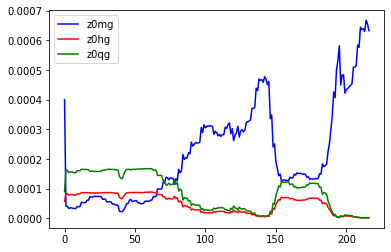

In [56]:
plt.plot(z0mg,'b')
plt.plot(z0hg,'r')
plt.plot(z0qg,'g')

plt.legend(['z0mg','z0hg','z0qg'])


In [58]:
## what about in an all Evergreen tree case??


logFile = '/Users/mdfowler/Documents/Analysis/NoiseIssue/lnd.log.210316-142314_EvergreenOnlyCLASPcase'
with open(logFile) as f:
    lines = f.readlines()
    


In [63]:
z0mv = []

for iLines in range(len(lines)):
    if lines[iLines].startswith(' MDF:   z0mv(p) =')==True:
        strArr  = lines[iLines].split('=')
        mv      = strArr[1].split('\n')
        z0mv    = np.append(z0mv, float(mv[0]))
                

In [65]:
z0mv

array([0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483554,
       0.86483554, 0.86483554, 0.86483554, 0.86483554, 0.86483

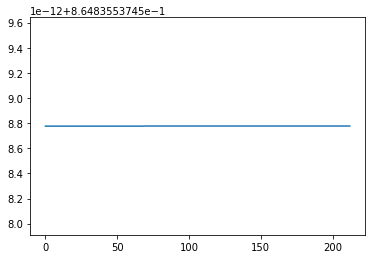

In [60]:
plt.plot(z0mv)